In [1]:
import os

In [2]:
os.chdir("../")

In [3]:
os.chdir("src")

In [4]:
import sys

from anomaly_detection import *
from utils import *
from data_preparation import *
from constants import DATA_PATH, SEP_CSV

import matplotlib.pyplot as plt

## Loading The Data

In [5]:
os.chdir("../")

In [6]:
a = get_data()

In [7]:
print(a.head());

           c_FEATURE_1 c_FEATURE_2     c_FEATURE_3 c_FEATURE_4  c_VALUE
c_DATE                                                                 
2005-01-01     Belgien    Landwind             SUV                    0
2010-01-01     Belgien        MINI  Andere/Unspez.                    0
2004-01-01     Belgien        MINI          Cabrio                    0
2005-01-01     Belgien        MINI          Cabrio                   77
2006-01-01     Belgien        MINI          Cabrio                   58


## Reading Dataset

In [8]:
a.shape

(4074072, 5)

In [9]:
a.columns

Index(['c_FEATURE_1', 'c_FEATURE_2', 'c_FEATURE_3', 'c_FEATURE_4', 'c_VALUE'], dtype='object')

In [10]:
a.dtypes

c_FEATURE_1    object
c_FEATURE_2    object
c_FEATURE_3    object
c_FEATURE_4    object
c_VALUE         int64
dtype: object

In [11]:
# a = a.rename(columns = {'c_FEATURE_1':'Region', 'c_FEATURE_2':'Main_Brand', 
#                         'c_FEATURE_3':'Model', 'c_FEATURE_4':'TypeOfModel', 'c_VALUE':'Registration_Number'})
# a.head()

## Handling The Missing Values

In [12]:
a.isnull().sum()

c_FEATURE_1    0
c_FEATURE_2    0
c_FEATURE_3    0
c_FEATURE_4    0
c_VALUE        0
dtype: int64

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4074072 entries, 2005-01-01 to 2012-12-01
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   c_FEATURE_1  object
 1   c_FEATURE_2  object
 2   c_FEATURE_3  object
 3   c_FEATURE_4  object
 4   c_VALUE      int64 
dtypes: int64(1), object(4)
memory usage: 186.5+ MB


In [14]:
a["c_FEATURE_1"].value_counts()

Deutschland       468192
Schweiz           352104
Niederlande       349176
Italien           330936
Frankreich        317100
Belgien           312504
Spanien           282792
Großbritannien    272100
Luxemburg         252624
Dänemark          241632
Irland            203088
Finnland          202440
Portugal          190104
Estland           120084
Lettland          110376
Litauen            48600
Schweden           10260
Norwegen            9960
Name: c_FEATURE_1, dtype: int64

In [15]:
a["c_FEATURE_2"].value_counts()

Mercedes     231708
VW           223320
Ford         197508
BMW          189072
Peugeot      183384
              ...  
Romanital        12
Heibao           12
Voyah            12
PSA              12
ICKX             12
Name: c_FEATURE_2, Length: 264, dtype: int64

In [16]:
a["c_FEATURE_3"].value_counts()

Hatch             737352
Limousine         722940
Kombi             500712
SAV               427176
Coupe             294732
MPV               294420
Andere/Unspez.    244920
Transporter       188580
SUV               185688
Cabrio            159336
Roadster          122136
SAT                98316
4tr Coupe          44232
SAC                38352
Pick-Up            11232
Truck               3912
Bus                   36
Name: c_FEATURE_3, dtype: int64

In [17]:
a["c_FEATURE_4"].value_counts()

Unspec.               119364
3er                    41796
E-Klasse               41280
Astra                  36408
Golf                   35256
                       ...  
U6                        12
UNIC Daily                12
F-Series Class 4/5        12
Unitrac-Series            12
Inspire                   12
Name: c_FEATURE_4, Length: 2061, dtype: int64

In [18]:
a_country = a.groupby(["c_FEATURE_1"])
a_country["c_VALUE"].mean()

c_FEATURE_1
Belgien            59.898603
Deutschland       282.761365
Dänemark           24.630517
Estland             3.298458
Finnland           22.263975
Frankreich        265.165746
Großbritannien    324.138618
Irland             20.702026
Italien           222.807304
Lettland            2.583487
Litauen             2.086379
Luxemburg           5.919628
Niederlande        56.225359
Norwegen           70.626707
Portugal           35.808678
Schweden           41.304581
Schweiz            31.584415
Spanien           138.202888
Name: c_VALUE, dtype: float64

In [19]:
a_country["c_VALUE"].sum()

c_FEATURE_1
Belgien            18718553
Deutschland       132386609
Dänemark            5951521
Estland              396092
Finnland            4507119
Frankreich         84084058
Großbritannien     88198118
Irland              4204333
Italien            73734958
Lettland             285155
Litauen              101398
Luxemburg           1495440
Niederlande        19632546
Norwegen             703442
Portugal            6807373
Schweden             423785
Schweiz            11120999
Spanien            39082671
Name: c_VALUE, dtype: int64

In [20]:
key_stats = a.groupby(['c_FEATURE_1', 'c_FEATURE_2', 'c_FEATURE_3', 'c_FEATURE_4'])['c_VALUE'].agg(['sum', 'mean'])
print(key_stats)

                                                    sum      mean
c_FEATURE_1 c_FEATURE_2 c_FEATURE_3    c_FEATURE_4               
Belgien     AMC         Andere/Unspez. Pacer          3  0.250000
            Aiways      SAV            U5            97  2.694444
            Alfa Romeo  Coupe          4C           173  2.059524
                                       8C             6  0.250000
                                       Brera        576  3.692308
...                                                 ...       ...
Spanien     Wiesmann    Roadster       Roadster       2  0.166667
            Yugo        Andere/Unspez. 45           297  4.950000
                                       Unspec.      913  6.916667
                        Hatch          45           228  2.714286
                                       Florida      342  7.125000

[25822 rows x 2 columns]


In [21]:
unique_keys = a[['c_FEATURE_1', 'c_FEATURE_2', 'c_FEATURE_3', 'c_FEATURE_4']].drop_duplicates()
print(unique_keys)

            c_FEATURE_1 c_FEATURE_2     c_FEATURE_3 c_FEATURE_4
c_DATE                                                         
2005-01-01      Belgien    Landwind             SUV            
2010-01-01      Belgien        MINI  Andere/Unspez.            
2004-01-01      Belgien        MINI          Cabrio            
2011-01-01      Belgien        MINI           Coupe            
2001-01-01      Belgien        MINI           Hatch            
...                 ...         ...             ...         ...
2011-01-01      Italien  Great Wall  Andere/Unspez.     unspec.
2004-01-01  Niederlande         PGO        Roadster     unspec.
2008-01-01      Schweiz         PGO        Roadster     unspec.
2007-01-01      Spanien       Scion           Hatch          xA
2008-01-01      Spanien       Scion             MPV          xB

[25822 rows x 4 columns]


In [22]:
e = get_filtered_timeseries(a, "Belgien", "Alfa Romeo", "Coupe",  "4C")
print(e)

            c_VALUE
c_DATE             
2013-01-01        0
2014-01-01        0
2015-01-01        3
2016-01-01        0
2017-01-01        2
...             ...
2015-12-01        0
2016-12-01        0
2017-12-01        0
2018-12-01        0
2019-12-01        0

[84 rows x 1 columns]


In [23]:
b = get_filtered_timeseries(a,  "Belgien",  "MINI",  "Cabrio",  "")
print(b)

            c_VALUE
c_DATE             
2004-01-01        0
2005-01-01       77
2006-01-01       58
2007-01-01       71
2008-01-01       58
...             ...
2016-12-01        6
2017-12-01        2
2018-12-01        1
2019-12-01        0
2008-12-01        0

[360 rows x 1 columns]


## Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize":(7,5), "figure.dpi":150})
import warnings
warnings.filterwarnings("ignore")

In [25]:
os.chdir("figures")

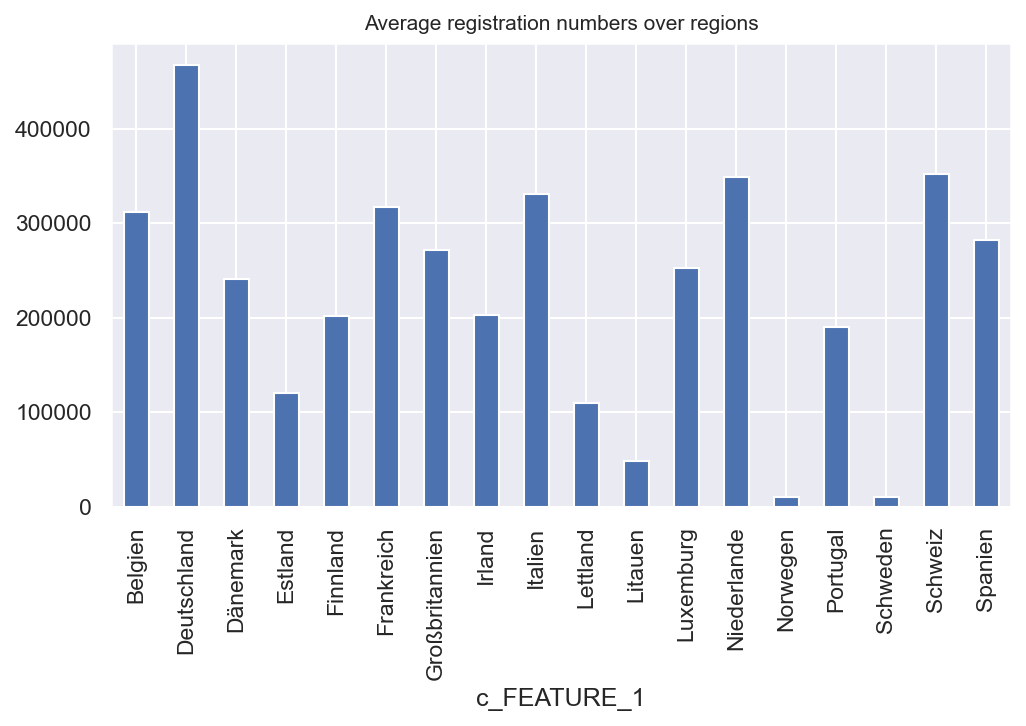

In [26]:
a_country.size().plot(kind = "bar")
plt.title('Average registration numbers over regions', fontsize = 10)

# Set tight layout to remove extra whitespace
plt.tight_layout()

# Save the plot with a specific size and DPI
plt.savefig('average_registrations.png', bbox_inches='tight', dpi=300)

In [27]:
os.chdir("../")

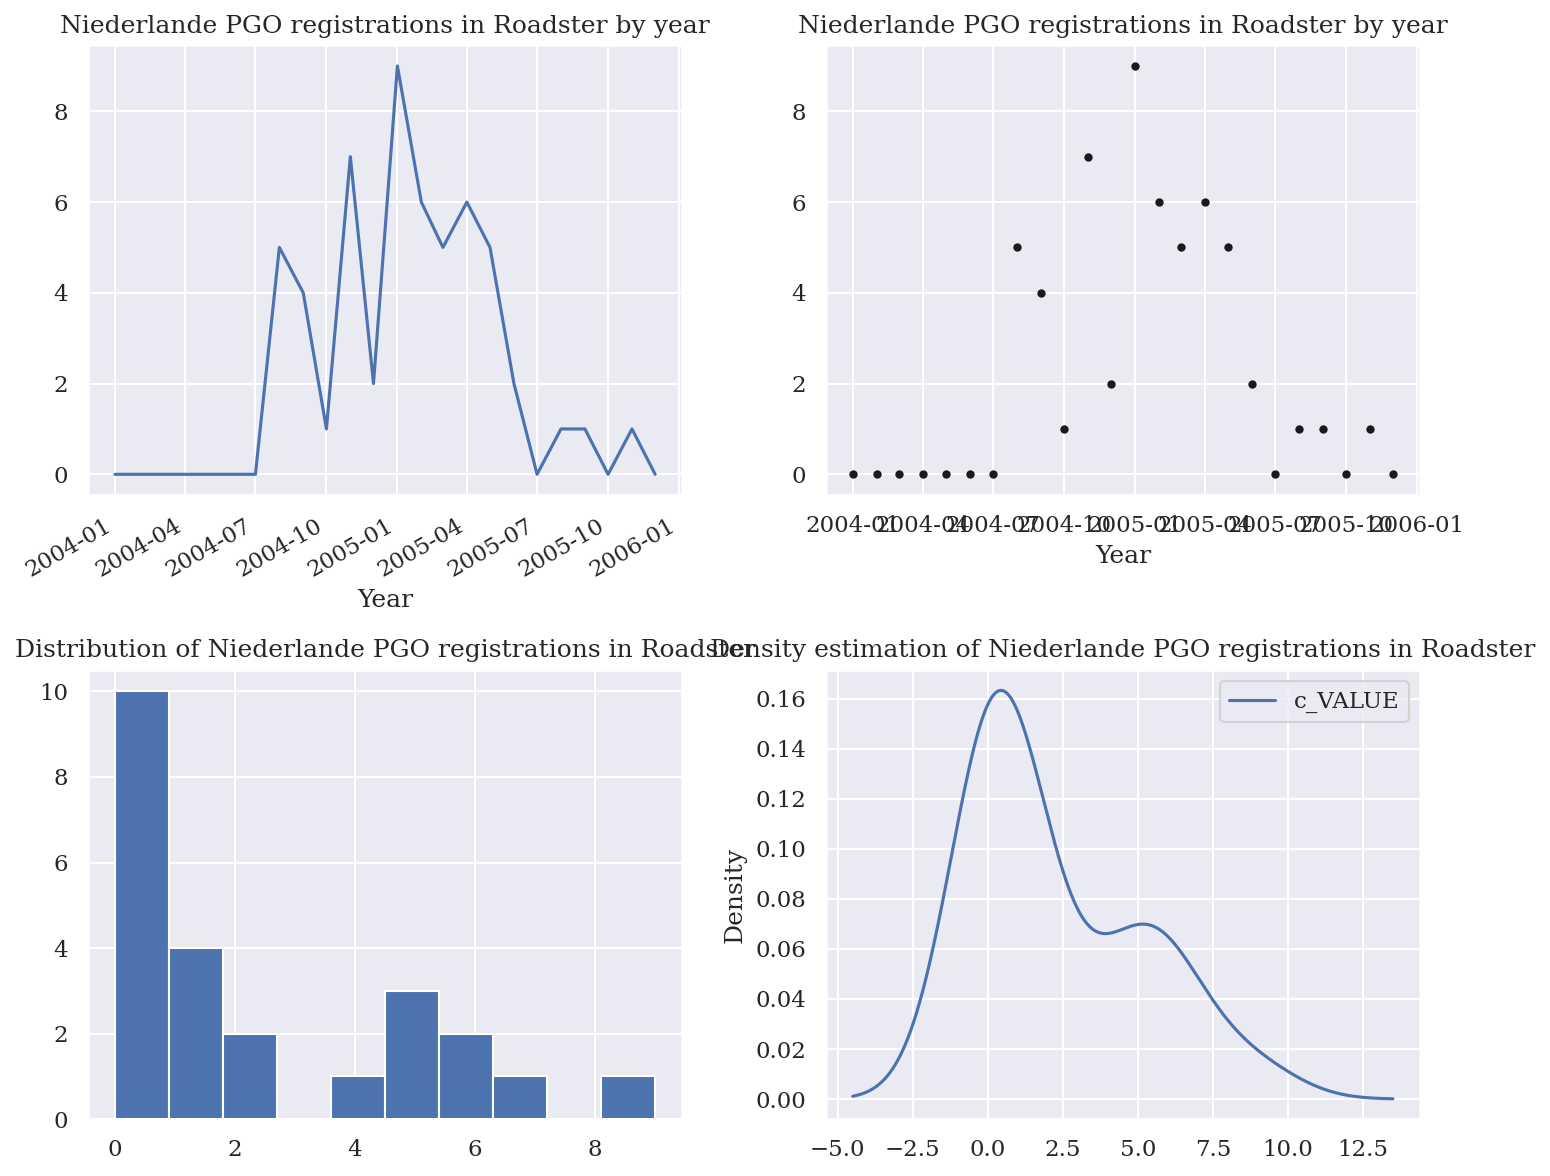

None


In [28]:
c = plot_sample('Niederlande', 'PGO', 'Roadster', 'unspec.')
print(c)

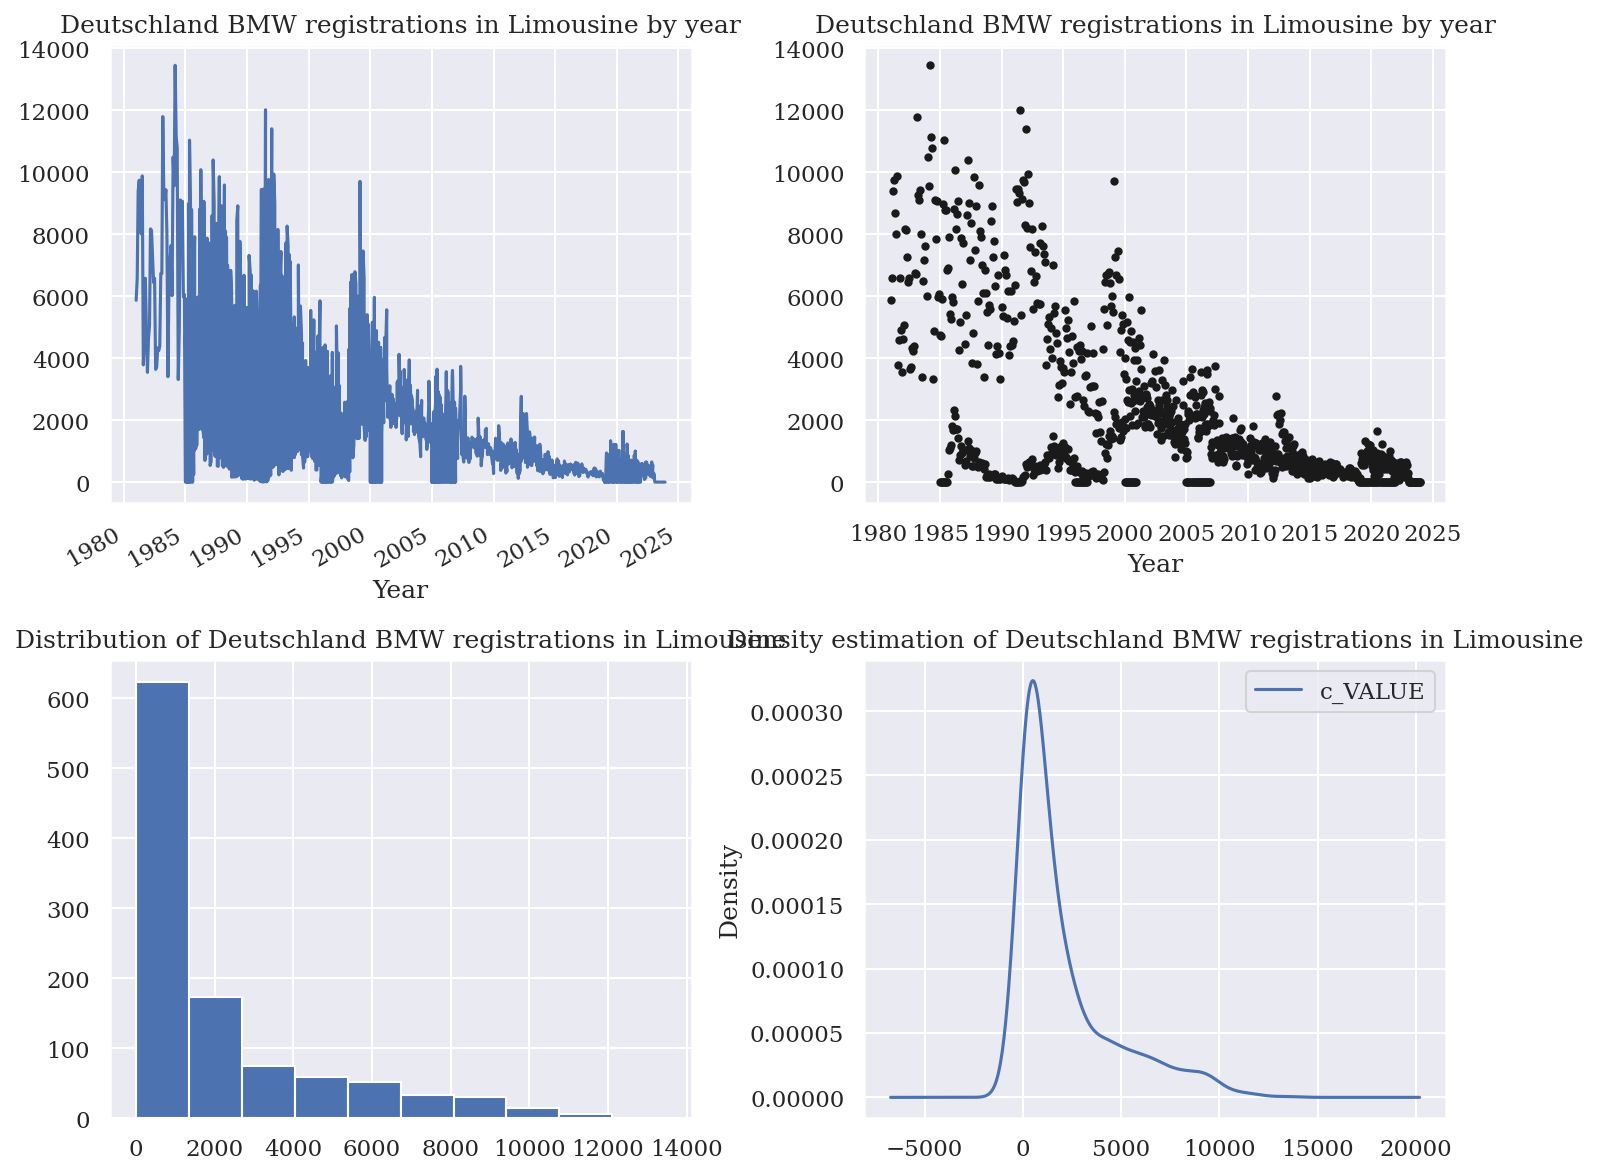

None


In [29]:
d = plot_sample()
print(d)

In [30]:
df = get_data()
    
unique_keys = df[['c_FEATURE_1', 'c_FEATURE_2', 'c_FEATURE_3', 'c_FEATURE_4']].drop_duplicates()
# Filter unique keys based on the chosen country (c_FEATURE_1)
unique_keys_country = unique_keys[unique_keys['c_FEATURE_1'] == "Belgien"]
print(unique_keys_country)
print(len(unique_keys_country))

           c_FEATURE_1 c_FEATURE_2     c_FEATURE_3 c_FEATURE_4
c_DATE                                                        
2005-01-01     Belgien    Landwind             SUV            
2010-01-01     Belgien        MINI  Andere/Unspez.            
2004-01-01     Belgien        MINI          Cabrio            
2011-01-01     Belgien        MINI           Coupe            
2001-01-01     Belgien        MINI           Hatch            
...                ...         ...             ...         ...
2021-01-01     Belgien         BMW             SAV          iX
2022-01-01     Belgien         BMW             SAV         iX1
2010-01-01     Belgien     Hyundai             SAT        ix20
2010-01-01     Belgien     Hyundai             SAV        ix35
2008-01-01     Belgien     Hyundai             SAV        ix55

[1836 rows x 4 columns]
1836
